In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [12]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
X = df.iloc[:, :-1].values  # X label - selecting whole df except the last head(Outcome)
Y = df.iloc[:, -1].values   # Y label - slecting the outcomes

In [23]:
#splitting data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=69)


In [24]:
# Normalizing the dataframe for better results
# StandardScarler ====>  removing mean and scalling to unit variance ==> (x - mean) / variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train.shape

(614, 8)

In [72]:
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(24, activation='relu', input_shape= (X_train.shape[1],)), # making the architechture simple due to overfitting
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
trained = model.fit(X_train, Y_train, epochs=100, batch_size=60, validation_data=(X_test, Y_test), verbose=1)
#
# on training for epochs = 210 and batch_Size = 12 and 2 hidden layers=> loss = 0.063 and overfitting
# on training for epochs = 50 and vatchs-size = 45 and 1 hidden layer => high variance if epoch = 100


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3335 - loss: 0.8425 - val_accuracy: 0.3377 - val_loss: 0.8055
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3346 - loss: 0.7968 - val_accuracy: 0.3506 - val_loss: 0.7644
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3923 - loss: 0.7548 - val_accuracy: 0.4286 - val_loss: 0.7301
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4726 - loss: 0.7107 - val_accuracy: 0.5195 - val_loss: 0.7008
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4931 - loss: 0.6977 - val_accuracy: 0.5844 - val_loss: 0.6751
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5808 - loss: 0.6636 - val_accuracy: 0.6299 - val_loss: 0.6532
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6235 - loss: 0.6473 - val_accuracy: 0.6494 - val_loss: 0.6333
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6712 - loss: 0.6339 - val_accuracy: 0.6883 -

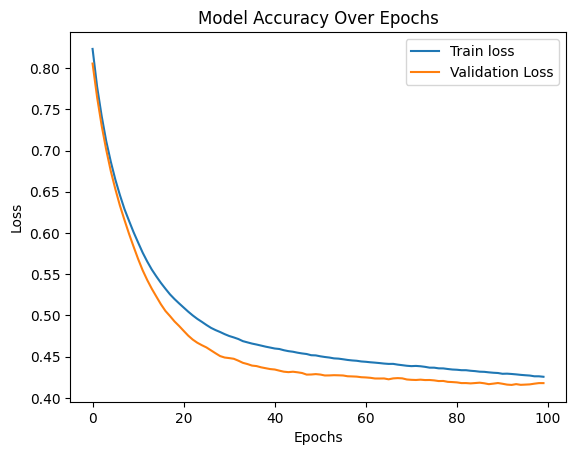

In [76]:
import matplotlib.pyplot as plt

plt.plot(trained.history['loss'], label='Train loss')
plt.plot(trained.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

# overfitting

In [77]:
def predict_diabetes(model, scaler, new_data):
    """
    Make predictions for new data using the trained model

    Parameters:
    model: Trained keras model
    scaler: Fitted StandardScaler
    new_data: Array or DataFrame with the same features as training data
    """
    # Ensure data is in correct format
    if isinstance(new_data, pd.DataFrame):
        new_data = new_data.values

    # Reshape if single sample
    if len(new_data.shape) == 1:
        new_data = new_data.reshape(1, -1)

    # Scale the data using the same scaler
    scaled_data = scaler.transform(new_data)

    predictions = model.predict(scaled_data)
    class_predictions = (predictions > 0.5).astype(int)

    return predictions, class_predictions

In [78]:
sample_data = np.array([6, 148, 72, 35, 0, 33.6, 0.627, 50])  # Example values
prob, prediction = predict_diabetes(model, scaler, sample_data)
print(f"Probability of diabetes: {prob[0][0]:.3f}")
print(f"Prediction (0=No, 1=Yes): {prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Probability of diabetes: 0.756
Prediction (0=No, 1=Yes): 1
